<a href="https://colab.research.google.com/github/Abu-Taher01/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install numpy
import numpy as np
import pandas as pd

np.random.seed(23)

In [2]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])

class1_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df= pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])

df['target'] = 1

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])

class2_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df1= pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df,df1],ignore_index=True)

df = df.sample(40)

In [3]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,-0.822939,-1.598109,0.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [4]:
import plotly.express as px

fig=px.scatter_3d(df, x='feature1',y='feature2',z='feature3',color=df['target'].astype('str'))

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                              color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [5]:
# step 1 - Apply standard scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [6]:
#step 2 - Find Covarience Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covarience Matrix: \n', covariance_matrix)

Covarience Matrix: 
 [[ 1.02564103  0.06781177 -0.12497686]
 [ 0.06781177  1.02564103 -0.15241116]
 [-0.12497686 -0.15241116  1.02564103]]


In [7]:
#step 3 - Finding Eigen-values and Eigen-vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [8]:
eigen_values

array([1.25911792, 0.95953081, 0.85827434])

In [10]:
pc=eigen_vectors[:2]

In [11]:
pc

array([[-0.51038783, -0.78846385,  0.34326234],
       [-0.569092  ,  0.60894401,  0.55255904]])

In [16]:
transformed_df=np.dot(df.iloc[:,0:3],pc.T)
new_df=pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target']=df['target'].values
new_df.head()

,PC1,PC2,target
0,0.560815,-1.471948,1
1,1.740278,-0.643400,0
2,-0.706342,-0.080489,1
3,-0.786474,-1.876564,1
4,1.105696,1.622028,1


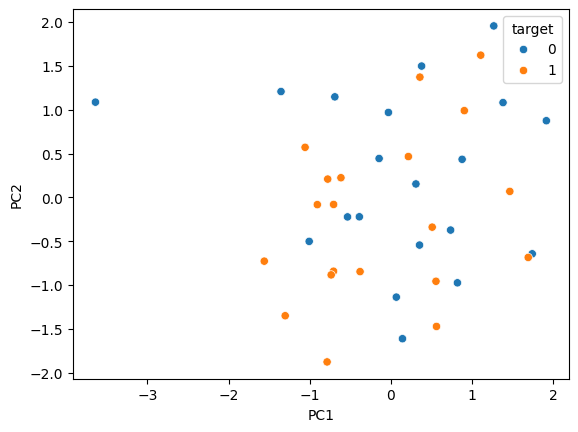

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=new_df,x='PC1',y='PC2',hue='target')
plt.show()

In [18]:
new_df['target']=new_df['target'].astype('str')
fig=px.scatter(new_df,x='PC1',y='PC2',color='target')
fig.show()

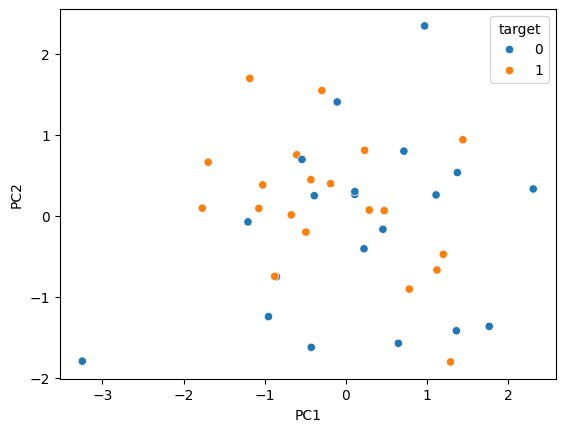

In [19]:
# prompt: run the built in sklearn pca on my dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.iloc[:, 0:3])

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = df['target'].values

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target')
plt.show()

pca_df['target'] = pca_df['target'].astype('str')
fig = px.scatter(pca_df, x='PC1', y='PC2', color='target')
fig.show()